(<matplotlib.image.AxesImage at 0x28b01752f10>, (-0.5, 1023.5, 767.5, -0.5))

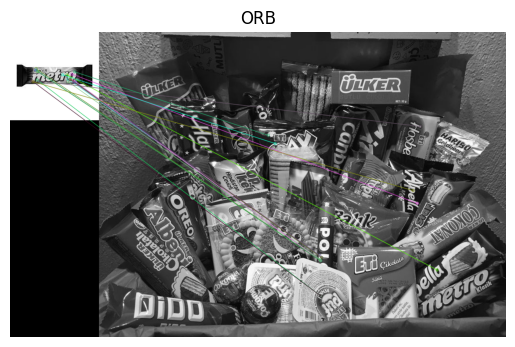

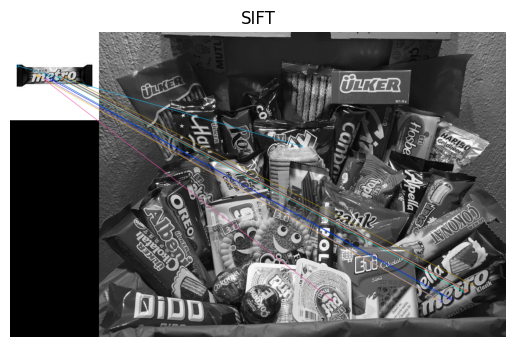

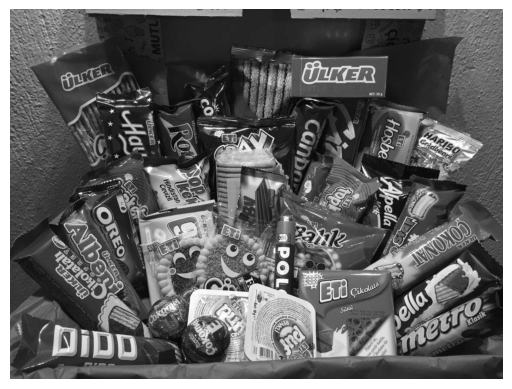

In [15]:
import cv2
import matplotlib.pyplot as plt

main_img = cv2.imread('D:/examples_forDeepLearning/ObjectDeteciton/featureMatching/src/main_img.jpg',0)
img = cv2.imread('D:/examples_forDeepLearning/ObjectDeteciton/featureMatching/src/metro.jpg',0)

#ORB


#köşe kenar gibi nesneye ait özellikler
orb = cv2.ORB_create()

#anahtar nokta tespiti
kp1,des1 = orb.detectAndCompute(img,None)
kp2,des2 = orb.detectAndCompute(main_img,None)

#bf matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

#noktları eşleştirelim
matches = bf.match(des1,des2)

#mesafeye göre sıralayalım
matches = sorted(matches,key = lambda x: x.distance) 

#eşleşen resimleri görselleştirelim
plt.figure()
img_match = cv2.drawMatches(img,kp1,main_img,kp2,matches[:20],None,flags=2)
plt.imshow(img_match),plt.axis('off'),plt.title('ORB')


#SIFT


#sift orb'ye göre daha iyi mesela bu fotoda size ları bile eşit değil farklıklar var o sayede doğruluk oranı daha yüksek 
sift = cv2.xfeatures2d.SIFT_create()

#sift ile anahtar nokta tespiti 
kp1,des1 = sift.detectAndCompute(img,None)
kp2,des2 = sift.detectAndCompute(main_img,None)
bf = cv2.BFMatcher() #bf matcher
matches = bf.knnMatch(des1,des2,k=2)  #en yakın komşuları buluyoruz (eşleştiriyoruz)

guzel_eslesme = [] #doğrulugu yuksek eşleştirmeleri liste içine alalım

for match1 , match2 in matches:
    if match1.distance < 0.75*match2.distance:
        guzel_eslesme.append([match1])


#eşleşen resimleri görselleştirelim
plt.figure()
sift_matches = cv2.drawMatchesKnn(img,kp1,main_img,kp2,guzel_eslesme,None,flags=2)
plt.imshow(sift_matches),plt.axis('off'),plt.title('SIFT')

plt.figure()
plt.imshow(main_img,cmap='gray'),plt.axis('off')

# plt.figure()
# plt.imshow(img,cmap='gray'),plt.axis('off')
